# Observations for the night July 07th 2021 : Try to use QuickLookExp


https://harvard.zoom.us/rec/play/N7umVF8Rk3vWvW_O3jkaTinofB2WxW3QKz0fVai_K-qvAYLt37uMrvskOlnBiMEjduSeQVzWT7_DDYzc.IY7Pqjef82YlWmZE?continueMode=true&_x_zm_rtaid=BjQYrDaETYeYRUMw8NQgLw.1613559822570.c813d210d38e378b719cb4048493df5b&_x_zm_rhtaid=205


- work with Weakly_2021_36
- use jupyter kernel LSST
- requires the installation see https://github.com/stubbslab/PCWG-AuxTel/blob/main/setup_script.md
- requires to write in file {HOME}/notebooks/.user_setups


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2021/09/06
- update : 2021/10/13 : Turn the image and split hdulist into 2 parts


In [92]:
#! eups list -s

In [93]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.io import fits

In [94]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend("lsst.display.firefly")

In [95]:
# correct for bug in stack in wl_2021_02
# %config IPCompleter.use_jedi=False

In [96]:
FLAG_SAVE_IMAGE=True

In [97]:
!ls /project/shared/auxTel/rerun/mfl/slurmRun

calexp	icExp  postISRCCD	     repositoryCfg.yaml  spectractorOutput
config	icSrc  processStar_metadata  schema


In [98]:
!ls /project/shared/auxTel

CALIB	   CALIB-OLD	 CALIB-RHL  Fossil   _parent.old  rerun
CALIB_OLD  calibrations  dagoret    _parent  ref_cats


In [99]:
!ls /project/shared/auxTel/rerun/quickLook -l

total 71
drwxrwsrwx  5 49813 1363  4096 Sep 30 12:50 calexp
drwxrwsrwx  2 49813 1363  4096 Feb 21  2020 config
drwxrwsrwx  5 49813 1363  4096 Sep 30 12:49 icExp
drwxrwsrwx  8 49813 1363  4096 Sep 30 12:49 icSrc
drwxrwsrwx  5 49813 1363  4096 Sep 30 12:48 postISRCCD
drwxrwsrwx 72 49813 1363 32768 Oct 11 21:15 quickLookExp
-rwxrwxrwx  1 49813 1363   458 Feb 21  2020 repositoryCfg.yaml
-rwxrwxrwx  1 49813 1363   458 May 16 20:28 repositoryCfg.yaml_backup
drwxrwsrwx  5 49813 1363  4096 Sep 30 12:50 spectractorOutput


# Configuration

## Location and date

In [100]:
SOFT_VERSION="v2"

In [101]:
from lsst.rapid.analysis.nightReport import NightReporter
# data exist here
repoDir='/project/shared/auxTel/rerun/quickLook'
# recommended but wrong
#repoDir='project/shared/auxTel/rerun/mfl/slurmRun'
dayObs="2021-07-07"
reporter=NightReporter(repoDir,dayObs)

Loaded data for seqNums 1 to 620


# Selection

In [102]:
DISPERSER_SEL="holo4_003"

In [110]:
FLAG_FLAT_SELECTION=True

# Information from reporter

In [104]:
print(reporter.getObservedObjects())

['HD 152726', 'HD  29134', 'HD   5902', 'HD 132223', 'HD 209062', 'HD 191116', 'HD  83745', 'HD 137795', 'HD   9639', 'HD 147422', 'HD 122931', 'HD 196078', 'HD 123613A', 'HD 122657', 'HD 179699', 'HD 170873', 'HD 183050', 'HD 126720', 'Spica', 'HD  15115', 'HD 173975', 'HD 222042', 'HD 149023', 'HD117637', '*  14 Del', 'HD 189080', 'V* CN Hyi', 'HD   1375', 'HD 176865', 'HD 157575', 'UNKNOWN', 'HD 208264', 'HD   4858', '*  46 Psc', 'HD 142579', 'HD 169864', 'HD 133601', 'HD 184971', 'HD  26413', 'HD 123509', 'HD 194916', 'HD 122153', 'HD 180771', 'HD 123339', 'HD 200498', 'HD 224265', 'HD 142794', 'HD 222805', 'HD 217715', 'HD 216163', 'HD 196401', 'slew_icrs', 'HD  22515', 'HD 208110', 'HD  20293', 'HD 122653', 'HD    242', 'HD   8733', 'HD    483', 'HD 123783', 'HD 166679', 'HD  13885', 'HD  21032', 'HD 186878', 'HD 198047', 'HD 192750', 'HD 209709', 'HD 122529', 'HD 164073', 'HD 181558', 'HD 144951', 'HR5064', 'HD 153750', 'HD 156675', 'HD 162379', '* tau Pav', 'HD 160617', 'HD 123

In [105]:
#reporter.makePolarPlotForObjects()

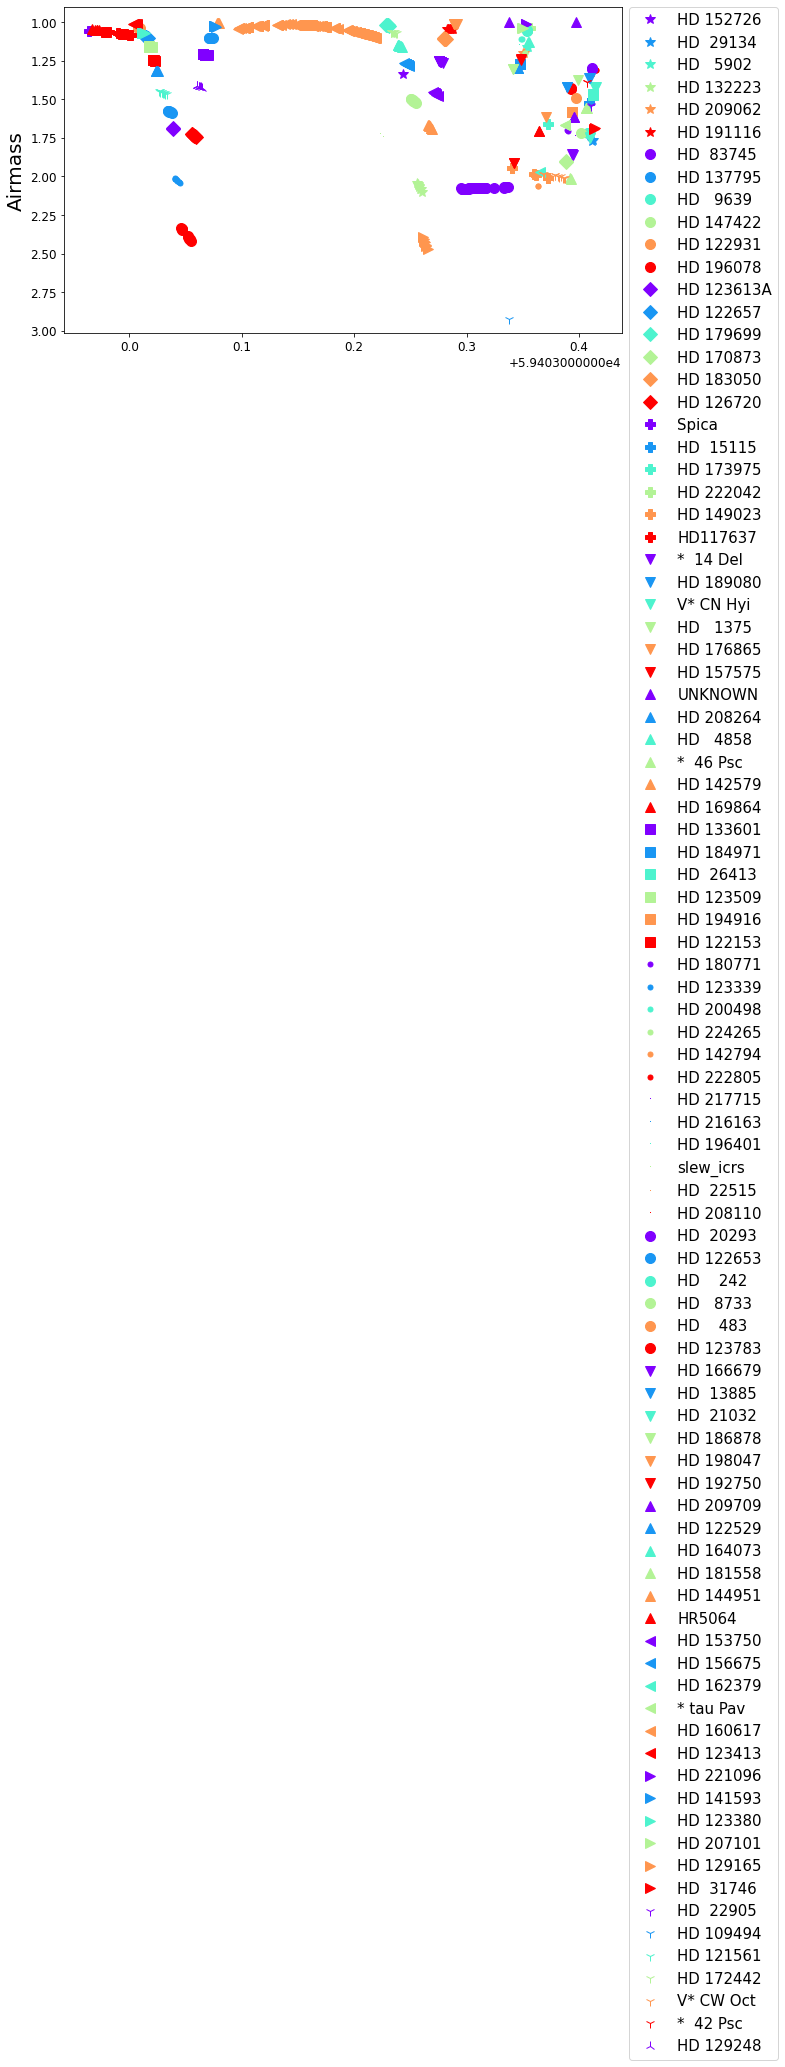

In [106]:
reporter.plotPerObjectAirMass()

In [107]:
reporter.printObsTable()

{seqNum} {imageType} {obj} {timeOfDay} {filt} {timeSinceLastExp} {expTime}
   1 bias      azel_target 21:36:34.162 RG610~empty                  0.0  0.00
   2 bias      azel_target 21:36:50.001 RG610~empty                 15.8  0.00
   3 bias      azel_target 21:36:54.499 RG610~empty                  4.5  0.00
   4 bias      azel_target 21:36:59.001 RG610~empty                  4.5  0.00
   5 bias      azel_target 21:37:03.500 RG610~empty                  4.5  0.00
   6 bias      azel_target 21:37:07.998 RG610~empty                  4.5  0.00
   7 bias      azel_target 21:37:12.501 RG610~empty                  4.5  0.00
   8 bias      azel_target 21:37:17.010 RG610~empty                  4.5  0.00
   9 bias      azel_target 21:37:21.518 RG610~empty                  4.5  0.00
  10 bias      azel_target 21:37:26.018 RG610~empty                  4.5  0.00
  11 bias      azel_target 21:37:30.513 RG610~empty                  4.5  0.00
  12 bias      azel_target 21:37:35.011 RG610~empty     

# Butler

## Configuration for Butler

In [108]:
#butler=dafPersist.Butler("/project/shared/auxTel")
butler=dafPersist.Butler(repoDir)

## Sequence selection

In [112]:
# Flats
all_myseq_flats=range(62,73)

# wide scan
# -----------
#all_myseq_holo=range(234,310)
# narrow scan
#-----------
all_myseq_holo=range(317,365)

if FLAG_FLAT_SELECTION:
    all_myseq=all_myseq_flats
else:
    all_myseq=all_myseq_holo

In [113]:
seqNum=all_myseq[0]

In [114]:
seqNum

62

## Display

In [ ]:
display1=afwDisplay.getDisplay(frame=1,port=80,name='sylviedc_debug_2021_07_07',url=os.environ["FIREFLY_URL"])

In [ ]:
raw=butler.get('raw',dayObs=dayObs,seqNum=seqNum)

In [ ]:
# and this command show the image
display1.mtv(raw)

In [ ]:
display1.getClient().display_url()

## Access to image sequence

In [ ]:
print(butler.queryMetadata('raw','seqNum',dayObs=dayObs))

## Access to quickLookExp image

- assembled
- defect and bias corrected
- not unflatfielded


In [115]:
exp=butler.get('quickLookExp',dayObs=dayObs,seqNum=seqNum)

CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210707_000062: 'MJD-OBS not found'


In [116]:
exp_image=exp.image.array

In [117]:
# Must flip for Spectractor reading
flip_image=np.flip(exp_image, 0)

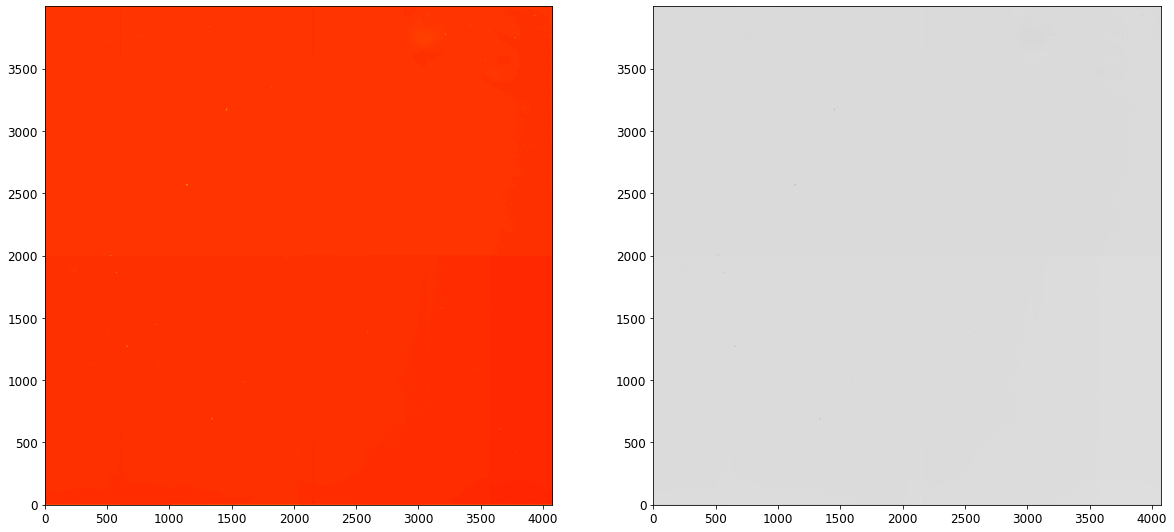

In [118]:
fig = plt.figure(figsize=(20,10))
ax=fig.add_subplot(121)
ax.imshow(flip_image,origin='lower',cmap="jet",norm=LogNorm())
ax=fig.add_subplot(122)
ax.imshow(flip_image,origin='lower',cmap="gray",norm=LogNorm())
plt.show()

In [119]:
type(flip_image)

numpy.ndarray

In [120]:
exp_image.shape

(4000, 4072)

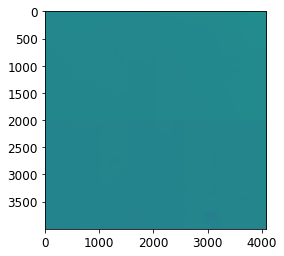

In [121]:
plt.imshow(flip_image)

## Meta Data

In [122]:
md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)

In [123]:
del md['DATASEC']
del md['COMMENT']
ha = md['HASTART']
#del md['HASTART']
md['HA'] = ha

In [124]:
md.toDict()

{'SIMPLE': True,
 'EXTEND': True,
 'ORIGIN': 'LSST DM Header Service',
 'TIMESYS': 'TAI',
 'DATE': '2021-07-07T22:37:54.775',
 'DATE-OBS': '2021-07-07T22:38:26.896',
 'DATE-BEG': '2021-07-07T22:38:26.896',
 'DATE-END': '2021-07-07T22:38:29.143',
 'MJD': 59402.9429950767,
 'MJD-OBS': 59402.9433668513,
 'MJD-BEG': 59402.9433668513,
 'MJD-END': 59402.9433928605,
 'OBSID': 'AT_O_20210707_000062',
 'GROUPID': '2021-07-07T22:38:26.449',
 'IMGTYPE': 'FLAT',
 'BUNIT': 'adu',
 'FACILITY': 'Vera C. Rubin Observatory',
 'TELESCOP': 'LSST AuxTelescope',
 'INSTRUME': 'LATISS',
 'OBSERVER': 'LSST',
 'OBS-LONG': -70.749417,
 'OBS-LAT': -30.244639,
 'OBS-ELEV': 2663.0,
 'OBSGEO-X': 1818938.94,
 'OBSGEO-Y': -5208470.95,
 'OBSGEO-Z': -3195172.08,
 'RA': 0.0,
 'DEC': 0.0,
 'RASTART': 133.944143232871,
 'DECSTART': -67.0430993791748,
 'RAEND': 133.964925147196,
 'DECEND': -67.0430730315125,
 'ROTPA': 216.514100290483,
 'ROTCOORD': 'sky',
 'HASTART': 0.0,
 'ELSTART': 38.9953171296947,
 'AZSTART': 205.69927

# Start

In [125]:
plt.rcParams["axes.labelsize"] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize']= 'large'
plt.rcParams['ytick.labelsize']= 'large'

In [130]:
all_my_exp_array=[]
all_my_header=[]
all_my_object=[]
all_my_seq=[]
all_my_grating=[]
all_my_filter=[]
all_my_date=[]


for seqNum in all_myseq:
    exp=butler.get('quickLookExp',dayObs=dayObs,seqNum=seqNum)
    md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)
    
    header=md.toDict()
    
    #decode header
    
    obj_name=header['OBJECT']
    obj_name2 = ''.join(obj_name.split())
    grating=header['GRATING']
    obsid=header['OBSID']
    date=obsid.replace('AT_O_','') # remove pre-tag to get date only and seqnum
    filter_name=header['FILTER']
    filter_name2=filter_name.split("_")[0]   # cut empty_1 to empty
    
    # work on header to remove bad things for ds9
    del header['DATASEC']
    del header['COMMENT']
    ha = header['HASTART']
    #del header['HASTART']
    header['HA'] = ha
        
    
    
    # select only pre-selected disperser
    if grating == DISPERSER_SEL and not FLAG_FLAT_SELECTION: 
        exp_image=exp.image.array
        flip_image=np.flip(exp_image, 0)  # flip the image for Spectractor
        all_my_exp_array.append(np.copy(flip_image))
        all_my_header.append(header)
        all_my_object.append(obj_name2)
        all_my_seq.append(header['SEQNUM'])
        all_my_grating.append(grating)
        all_my_filter.append(filter_name2)
        all_my_date.append(date)
    else:  # Flats
        exp_image=exp.image.array
        flip_image=np.flip(exp_image, 0)  # flip the image for Spectractor
        all_my_exp_array.append(np.copy(flip_image))
        all_my_header.append(header)
        all_my_object.append(obj_name2)
        all_my_seq.append(header['SEQNUM'])
        all_my_grating.append(grating)
        all_my_filter.append(filter_name2)
        all_my_date.append(date)

CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210707_000062: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210707_000063: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210707_000064: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210707_000065: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210707_000066: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210707_000067: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210707_000068: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210707_0000

In [135]:
idx=0
for exp_img in all_my_exp_array:
    print(idx,"......" ,exp_img.shape,'obj=',all_my_object[idx],"filt=",all_my_filter[idx],"disp=",all_my_grating[idx])
    idx+=1

0 ...... (4000, 4072) obj= FlatFieldposition filt= RG610 disp= empty_1
1 ...... (4000, 4072) obj= FlatFieldposition filt= RG610 disp= empty_1
2 ...... (4000, 4072) obj= FlatFieldposition filt= RG610 disp= empty_1
3 ...... (4000, 4072) obj= FlatFieldposition filt= RG610 disp= empty_1
4 ...... (4000, 4072) obj= FlatFieldposition filt= RG610 disp= empty_1
5 ...... (4000, 4072) obj= FlatFieldposition filt= RG610 disp= empty_1
6 ...... (4000, 4072) obj= FlatFieldposition filt= RG610 disp= empty_1
7 ...... (4000, 4072) obj= FlatFieldposition filt= RG610 disp= empty_1
8 ...... (4000, 4072) obj= FlatFieldposition filt= RG610 disp= empty_1
9 ...... (4000, 4072) obj= FlatFieldposition filt= RG610 disp= empty_1
10 ...... (4000, 4072) obj= FlatFieldposition filt= RG610 disp= empty_1


## Total number of images

In [132]:
NSEL=len(all_my_exp_array)

In [133]:
NSEL

11

# Plot

In [136]:
idx=0

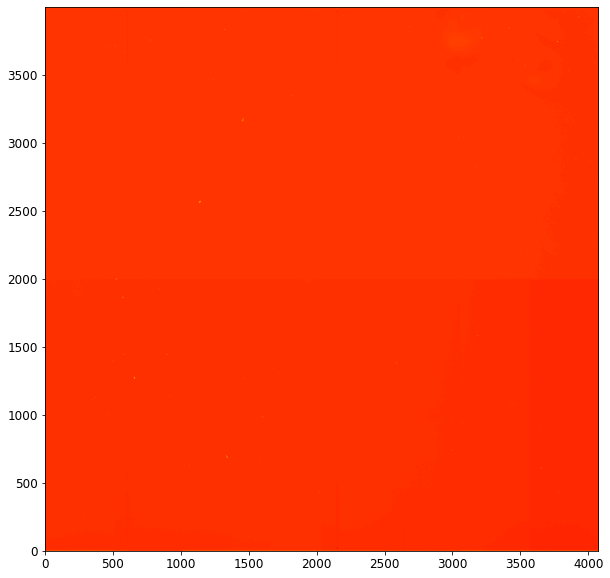

In [137]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.imshow(all_my_exp_array[idx],origin='lower',cmap="jet",norm=LogNorm())
plt.show()

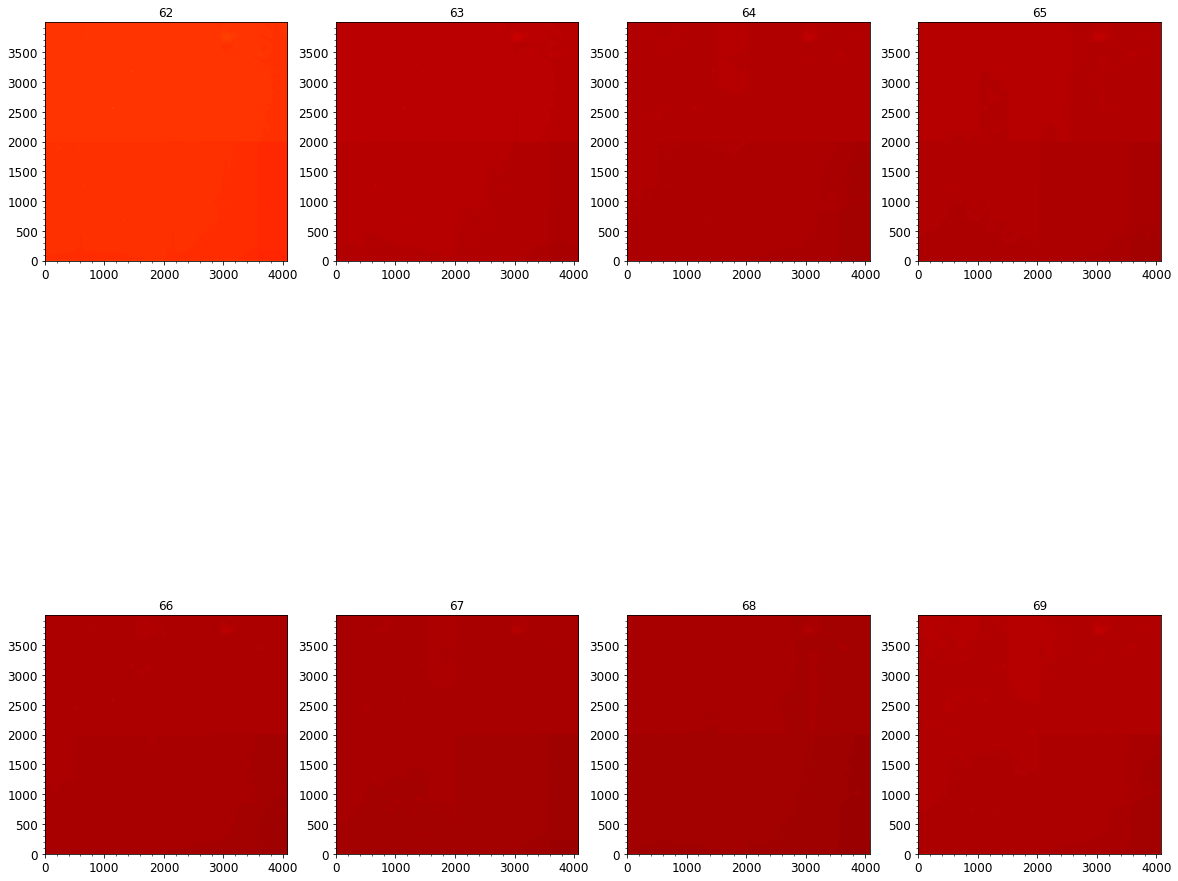

In [138]:

Ncol=4
Nrow=2
Ntot=Ncol*Nrow

fig = plt.figure(figsize=(20,20))

# loop on angle
for idx in np.arange(Ntot):
    if idx>=NSEL:
        break
        
    ax=fig.add_subplot(Nrow,Ncol,idx+1)
    ax.imshow(all_my_exp_array[idx],origin='lower',cmap="jet",norm=LogNorm())
    ax.set_title(all_myseq[idx]) 
    ax.minorticks_on()
    ax.set_aspect("equal")
    
    #ax2=ax.twiny()
    #ax2.imshow(all_my_raw_array[idx],origin='lower',cmap="jet",norm=LogNorm())
    #ax2.set_xlim(ax.get_xlim())
    #ax2.minorticks_on()
    
    #ax.tick_params(which='major', length=10, width=2, direction='inout')
    #ax.tick_params(which='minor', length=5, width=2, direction='inout')
    #ax.grid(which='both')



    #ax.set_aspect('equal')

    #x1, x2 = ax.get_xlim() 
    #y1, y2 = ax.get_ylim() 
plt.show()

In [ ]:
#all_my_raw_array=[]
#all_my_header=[]
#all_my_object=[]
#all_my_seq=[]
#all_my_grating=[]
#all_my_filter=[]


In [139]:
if FLAG_SAVE_IMAGE:
  
    for idx in np.arange(NSEL):
        filename=all_my_grating[idx]+"_"+all_my_filter[idx]+"_"+all_my_object[idx]+"_"+all_my_date[idx]+"_quickLookExp.fits"
        print(filename)
    
        hdr = fits.Header()
    
        for key,value in all_my_header[idx].items():
            hdr[str(key)]=value
        
        #hdu = fits.PrimaryHDU(data=all_my_exp_array[idx],header=hdr)  # with headers
        #hdul = fits.HDUList([hdu])
        #hdul.writeto(filename,overwrite=True)
        
        primary_hdu = fits.PrimaryHDU(header=hdr)
        image_hdu = fits.ImageHDU(all_my_exp_array[idx])
        hdu_list = fits.HDUList([primary_hdu, image_hdu])
    
        hdu_list.writeto(filename,overwrite=True)
    
        

empty_1_RG610_FlatFieldposition_20210707_000062_quickLookExp.fits
empty_1_RG610_FlatFieldposition_20210707_000063_quickLookExp.fits
empty_1_RG610_FlatFieldposition_20210707_000064_quickLookExp.fits
empty_1_RG610_FlatFieldposition_20210707_000065_quickLookExp.fits
empty_1_RG610_FlatFieldposition_20210707_000066_quickLookExp.fits
empty_1_RG610_FlatFieldposition_20210707_000067_quickLookExp.fits
empty_1_RG610_FlatFieldposition_20210707_000068_quickLookExp.fits
empty_1_RG610_FlatFieldposition_20210707_000069_quickLookExp.fits
empty_1_RG610_FlatFieldposition_20210707_000070_quickLookExp.fits
empty_1_RG610_FlatFieldposition_20210707_000071_quickLookExp.fits
empty_1_RG610_FlatFieldposition_20210707_000072_quickLookExp.fits
